In [ ]:
%pip install pandas pymystem3 pyldavis wordcloud nltk sentence_transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import pandas as pd
from pymystem3 import Mystem
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
from transformers import AutoModelForTokenClassification
from transformers.pipelines.token_classification import AggregationStrategy

from sentence_transformers import SentenceTransformer

from gensim import corpora
from gensim.models import LdaModel

from IPython.core.display import display, HTML
import pyLDAvis
import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis

import functools

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, make_scorer, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import nltk
from nltk.corpus import stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Введение в машинное обучение (применительно к NLP)

Обработка естественного языка (Natural Language Processing, NLP) — это ветвь искусственного интеллекта, которая фокусируется на взаимодействии между компьютерами и людьми посредством естественного языка. Она включает в себя разработку алгоритмов и моделей, которые позволяют машинам понимать, интерпретировать и генерировать человеческий язык ценным и осмысленным образом. Машинное обучение (ML) играет ключевую роль в продвижении NLP, стимулируя инновации и расширяя возможности приложений на основе языка.

Методы машинного обучения имеют важное значение для NLP по нескольким причинам:

* Обработка неструктурированных данных: Человеческий язык по своей природе неструктурирован и сложен. Алгоритмы ML могут обрабатывать большие объемы текстовых данных, выявлять закономерности и эффективно осмысливать эту неструктурированную информацию.

* Повышение точности и эффективности: Традиционные системы NLP, основанные на правилах, полагались на вручную составленные лингвистические правила. ML, особенно глубокое обучение, значительно улучшило точность и эффективность задач NLP, обучаясь на данных, а не полагаясь исключительно на заранее определенные правила.

* Масштабируемость: Модели ML, особенно те, которые основаны на нейронных сетях, могут масштабироваться для обработки огромных объемов данных, что позволяет приложениям, таким как перевод в реальном времени, анализ настроений и чат-боты, эффективно работать в масштабе.

* Адаптивность: Алгоритмы ML могут адаптироваться к новым языкам, диалектам и контекстам, обучаясь на новых данных, что делает их более гибкими и применимыми в различных сценариях по сравнению с традиционными методами.

Основные применения ML в NLP

+ Классификация текста: ML используется для категоризации текста по заранее определенным категориям. Применения включают обнаружение спама, анализ настроений и маркировку тем.

+ Распознавание именованных сущностей (NER): Это включает в себя идентификацию и классификацию сущностей в тексте, таких как имена людей, названия организаций, местоположения и даты. Модели ML могут быть обучены распознавать эти сущности с высокой точностью.

+ Машинный перевод: Модели ML, особенно те, которые основаны на нейронных сетях, таких как трансформеры, революционизировали машинный перевод, обеспечивая более точный и беглый перевод между языками.

+ Распознавание речи: Конвертация устного языка в текст включает сложные алгоритмы ML, которые могут точно понимать и транскрибировать речь. Это основа для виртуальных ассистентов, таких как Siri и Alexa.

+ Чат-боты и разговорные агенты: NLP с поддержкой ML необходимо для разработки чат-ботов, которые могут вести содержательные и контекстно значимые беседы с пользователями.

+ Суммирование текста: Алгоритмы ML могут создавать краткие резюме длинных документов, что облегчает быстрое усвоение больших объемов информации.

## Примерный алгоритм действий в задачах ML в области NLP:

0. **Сбор данных**:
   - Получение данных из открытых/закрытых источников или собственных БД.

1. **Разведочный анализ данных (EDA)**:
   - Анализ исходных данных для понимания их структуры, распределения и выявления возможных аномалий.
   - Визуализация данных, подсчет частот, выявление распределений и корреляций.

2. **Предобработка**:
   - Очистка данных: удаление или исправление пропущенных значений, ошибок и дубликатов.
   - Токенизация: разделение текста на слова или предложения.
   - Нормализация текста: приведение текста к нижнему регистру, удаление пунктуации, стоп-слов и лемматизация.
   - Преобразование текста в числовые представления: использование методов, таких как мешок слов (Bag of Words), TF-IDF или эмбеддинги слов (Word Embeddings).

3. **Обучение модели/выбор модели**:
   - Путь с выбором:
    - Выбор и настройка модели машинного обучения: выбор алгоритма, настройка гиперпараметров.
    - Обучение модели на обучающем наборе данных.
    - Валидация модели: оценка качества модели на валидационном наборе данных, настройка и улучшение модели на основе полученных результатов.
   - Путь с выбором
    - Поиск в открытых источниках huggingface / github
    - Выбор при момощи сравнения по метрикам (метрики ML/популярность/отзывы)

4. **Использование модели**:
   - Применение обученной модели к новым данным для прогнозирования или классификации.
   - Оценка производительности модели на тестовом наборе данных.
   - Развертывание модели в реальной среде для использования в приложениях, таких как чат-боты, системы анализа настроений, системы рекомендаций и другие.

## 0. Сбор данных

Просто берем с Kaggle:
https://www.kaggle.com/datasets/yutkin/corpus-of-russian-news-articles-from-lenta

In [ ]:
url = 'https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.1/lenta-ru-news.csv.bz2'

raw_df = pd.read_csv(url, compression='bz2')
raw_df.head()

<ipython-input-3-22f3c98051db>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(url, compression='bz2')


,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800975 entries, 0 to 800974
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     800975 non-null  object
 1   title   800975 non-null  object
 2   text    800970 non-null  object
 3   topic   738973 non-null  object
 4   tags    773756 non-null  object
 5   date    800975 non-null  object
dtypes: object(6)
memory usage: 36.7+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 1. Разведочный анализ данных (EDA)

In [ ]:
raw_df['text'] = raw_df['text'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
raw_df['text_len'] = raw_df['text'].apply(len)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
raw_df['date'] = pd.to_datetime(raw_df['date'], format='%Y/%m/%d')

In [ ]:
raw_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,url,title,text,topic,tags,date,text_len
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914-09-16,901
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914-09-16,346
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914-09-17,1923
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914-09-17,703
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914-09-18,754
...,...,...,...,...,...,...,...
800970,https://lenta.ru/news/2019/12/14/shnur/,Шнуров раскритиковал Гагарину на «Голосе»,Певец Сергей Шнуров раскритиковал свою коллегу...,NaN,ТВ и радио,2019-12-14,937
800971,https://lenta.ru/news/2019/12/14/dolg/,В России предложили изменить правила взыскания...,Министерство юстиции России предложило изменит...,NaN,Все,2019-12-14,1720
800972,https://lenta.ru/news/2019/12/14/dark_euro/,В России назвали «черную дату» для Европы,Испытание США ранее запрещенной Договором о ли...,NaN,Политика,2019-12-14,1067
800973,https://lenta.ru/news/2019/12/14/meteo/,Россиянам пообещали аномально теплую погоду,В ближайшие дни в европейской части России пог...,NaN,Общество,2019-12-14,1870


Посмотрим что с датами.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='date'>

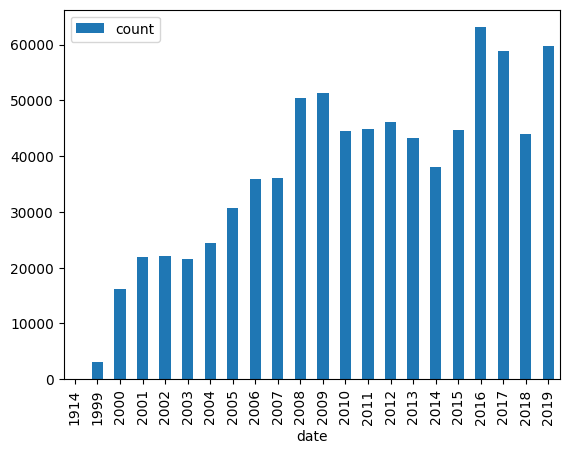

In [ ]:
(
    raw_df['date']
      .apply(lambda v: v.year)
      .value_counts()
      .to_frame()
      .sort_values(by='date')
      .plot(kind='bar')
)

Что с длинами. (Это важно для моделей).

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

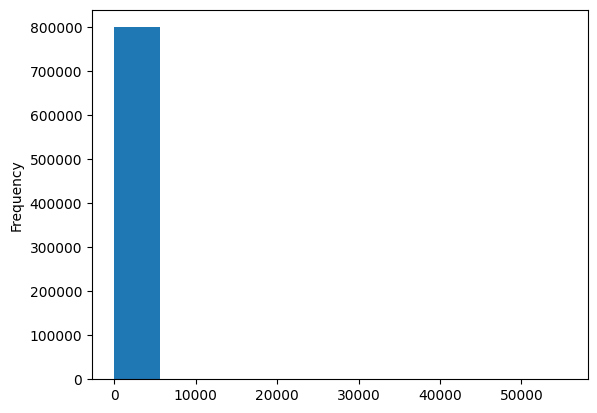

In [ ]:
raw_df['text_len'].plot(kind='hist')

<Axes: >

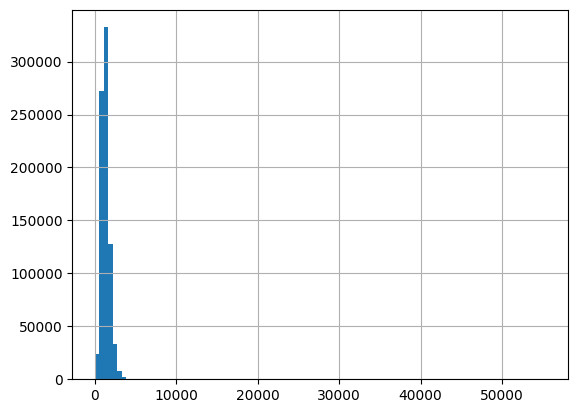

In [ ]:
raw_df['text_len'].hist(bins=100)

<Axes: >

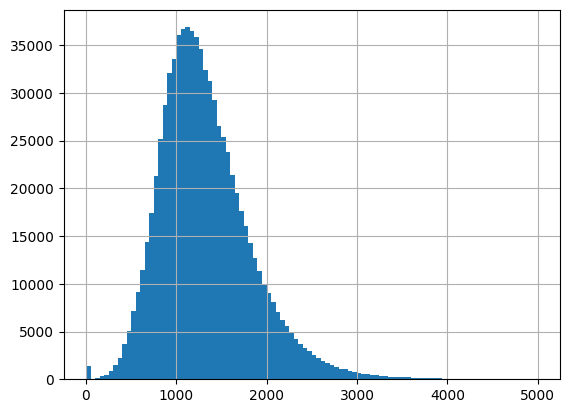

In [ ]:
raw_df[raw_df['text_len'] < 5000]['text_len'].hist(bins=100)

Что с темами.

<Axes: xlabel='topic'>

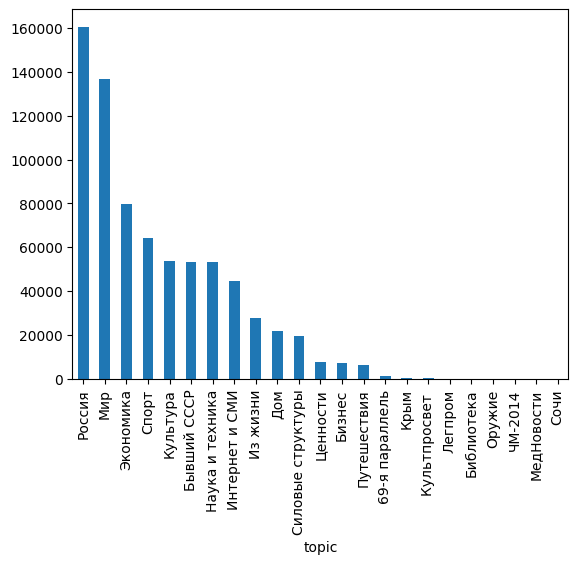

In [ ]:
raw_df['topic'].value_counts().plot(kind='bar')

## 2. Предобработка

Берем семпл, поскольку 800 тыс. это супермного.

In [ ]:
df = raw_df.sample(n=3_000, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic'>

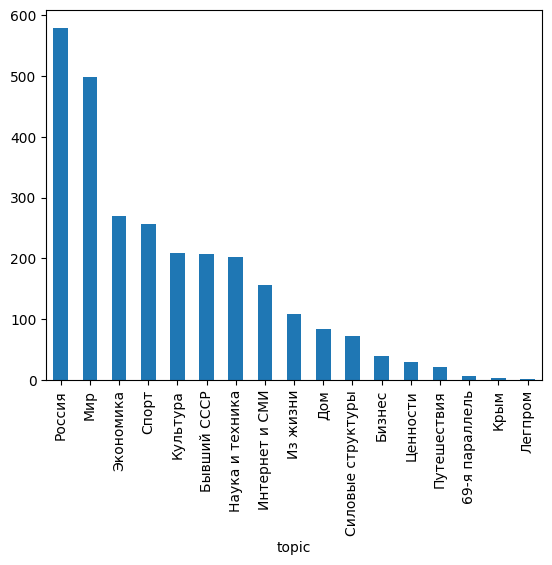

In [ ]:
df['topic'].value_counts().plot(kind='bar')

### Механика

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = stopwords.words("russian")
m = Mystem()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
url_pattern = re.compile(r'https?://\S+|www\.\S+')
def remove_urls(text):
    return url_pattern.sub(r' ', text)

date_pattern = re.compile(r"(\d{2}\.\d{2}\.?\d{0,4}?)\s")
def replace_dates(text):
    return date_pattern.sub(r'дата', text)

nonword_pattern = re.compile(r'[^а-яА-ЯёЁa-zA-Z\s\(\)]+')
def remove_nonwords(text):
    return nonword_pattern.sub(r' ', text)

money_pattern = re.compile(r"(\sр\s|руб)")
def replace_money_after_nonword(text):
    return money_pattern.sub(r'рублей', text)

def remove_extra_spaces(text):
    return re.sub(' +', ' ', text).strip()

def remove_unicode_chars(text):
    text = text.encode("utf8", "ignore").decode()
    return text

def remove_brackets(text):
    return text.replace("(", " ").replace(")", " ")

def remove_extra_spaces(text):
    return re.sub(' +', ' ', text).strip()

def tokenize(text):
    return nltk.word_tokenize(text)

def remove_stopwords(tokens):
    return list([t for t in tokens if t not in stop_words])

def lemmatize(tokens):
    lemmatized = []
    for t in tokens:
        lemma = m.lemmatize(t)[0]
        lemmatized.append(lemma)
    return lemmatized

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def process_text(text, processors=[
        remove_urls,
        replace_dates,
        remove_nonwords,
        replace_money_after_nonword,
        remove_extra_spaces,
        remove_unicode_chars,
    ]):
    for f in processors:
        text = f(text)
    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['processed_text'] = df['text'].apply(process_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def process_text_tfidf(text, processors=[
        tokenize,
        remove_stopwords,
        lemmatize,
    ]):
    for f in processors:
        text = f(text)
    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['processed_text_tfidf_tokens'] = df['processed_text'].apply(process_text_tfidf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['processed_text_tfidf'] = df['processed_text_tfidf_tokens'].apply(lambda v: ' '.join(v))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Векторизация

Кодировка и вложения (эмбеддинги) являются фундаментальными концепциями в обработке естественного языка (NLP). Эти методы позволяют преобразовать текстовые данные в числовые представления, которые могут быть обработаны моделями машинного обучения. Основная цель кодировки и вложений — представление слов, фраз или текстов в формате, пригодном для математических и статистических операций.

Цель кодировки и вложений заключается в создании числовых представлений, которые сохраняют семантическую информацию из текста. Это позволяет моделям машинного обучения лучше понимать контекст и значения слов в различных ситуациях. Правильная кодировка помогает улучшить производительность моделей на различных задачах, таких как классификация текста, анализ настроений, машинный перевод и другие.

In [ ]:
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=100, #10 75468
    max_df=1000,
    )
tfidf_matrix = tfidf.fit_transform(df['processed_text_tfidf'])
print(tfidf_matrix.shape, tfidf.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3000, 597) ['news' 'reuters' 'the' 'август' 'автомобиль' 'автор' 'агентство'
 'администрация' 'акция' 'александр' 'американский' 'андрей' 'апрель'
 'арестовывать' 'база' 'банк' 'безопасность' 'близкий' 'боевик' 'больница'
 'большинство' 'большой' 'борьба' 'британский' 'бывший' 'быть' 'вводить'
 'ведомство' 'великобритания' 'вернуться' 'версия' 'вести' 'весь' 'вечер'
 'взять' 'вид' 'вица' 'владелец' 'владимир' 'владимир путин' 'власть'
 'вместе' 'внимание' 'внутренний' 'во' 'военный' 'возбуждать'
 'возбуждать уголовный' 'возглавлять' 'возможность' 'возможный' 'война'
 'войско' 'вооруженный' 'вопрос' 'восемь' 'воскресение' 'впервые' 'время'
 'все' 'всего' 'встреча' 'вторник' 'второй' 'входить' 'выбор' 'выборы'
 'вызывать' 'выполнять' 'выпускать' 'выражать' 'вырастать' 'высокий'
 'выступать' 'выходить' 'газета' 'генеральный' 'германия' 'глава'
 'главный' 'го' 'говорить' 'говориться' 'город' 'госдума'
 'государственный' 'государство' 'готовый' 'гражданин' 'гражданский'
 'группа' 'давать' 

In [ ]:
def tfidf_top_features(tfidf, tfidf_matrix, head=10, tail=10):
  importance = np.argsort(np.asarray(tfidf_matrix.sum(axis=0)).ravel())[::-1]
  tfidf_feature_names = np.array(tfidf.get_feature_names_out())
  return tfidf_feature_names[importance[:head]], tfidf_feature_names[importance[-1*tail:]]
tfidf_top_features(tfidf, tfidf_matrix, 30, 30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array(['россия', 'компания', 'человек', 'свой', 'время', 'процент',
        'российский', 'это', 'становиться', 'президент', 'страна', 'слово',
        'один', 'первый', 'тысяча', 'сша', 'доллар', 'получать', 'миллион',
        'данный', 'отмечать', 'москва', 'как', 'дело', 'однако', 'новый',
        'на', 'город', 'по слово', 'место'], dtype=object),
 array(['заключение', 'всего', 'уходить', 'из', 'необходимый', 'требовать',
        'свое', 'выражать', 'февраль год', 'призывать', 'примерно',
        'готовый', 'возбуждать уголовный', 'полностью', 'внимание',
        'немой', 'сразу', 'заключать', 'предоставлять', 'тогда',
        'как отмечать', 'повод', 'пора', 'следовать', 'принимать решение',
        'подтверждать', 'оценка', 'интерес', 'между', 'середина'],
       dtype=object))

clustering

## Моделирование

### Кластеризация

Кластеризация является важным инструментом в обработке текстов, широко используемым для анализа и организации больших объемов текстовых данных. Этот метод позволяет группировать тексты на основе их сходства, что делает его полезным для различных исследовательских задач.

**Применение кластеризации в текстовом анализе**

1. **Исследование и анализ данных**:
   - Кластеризация помогает исследователям выявлять скрытые структуры в текстовых данных. Группируя похожие документы, можно легче обнаружить основные темы и тенденции, что облегчает анализ больших текстовых корпусов.

2. **Поиск аномалий**:
   - Кластеризация эффективна для выявления аномальных или нетипичных текстов. Документы, которые не попадают в основные кластеры, могут указывать на аномалии или исключительные случаи, требующие особого внимания.

**Преимущества кластеризации**

- **Автоматизация**: Кластеризация позволяет автоматизировать процесс организации и классификации текстов, что значительно экономит время и ресурсы.
- **Обнаружение тем**: Группировка текстов по сходству помогает выявлять ключевые темы и содержание без необходимости предварительного задания категорий.
- **Улучшение качества данных**: Поиск аномалий через кластеризацию помогает очищать данные, выявляя и устраняя нетипичные или ошибочные записи.

#### AgglomerativeClustering

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


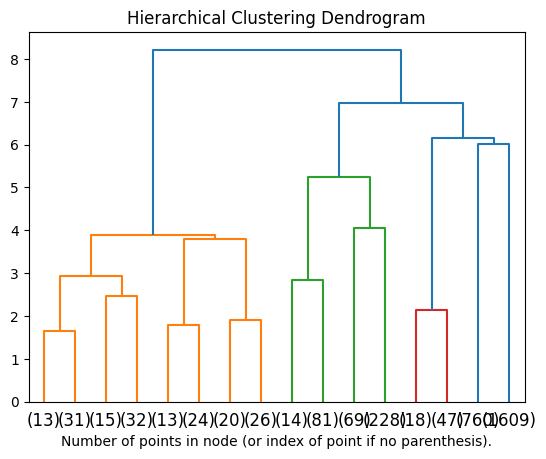

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)


X = tfidf_matrix.toarray()

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
model = AgglomerativeClustering(n_clusters=4)
clustering = model.fit(X)
df['agglomerative_clustering_labels'] = clustering.labels_
df['agglomerative_clustering_labels']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


264350    0
283172    0
151377    0
385650    0
479714    0
         ..
345064    0
279236    0
606062    1
405761    2
721015    0
Name: agglomerative_clustering_labels, Length: 3000, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


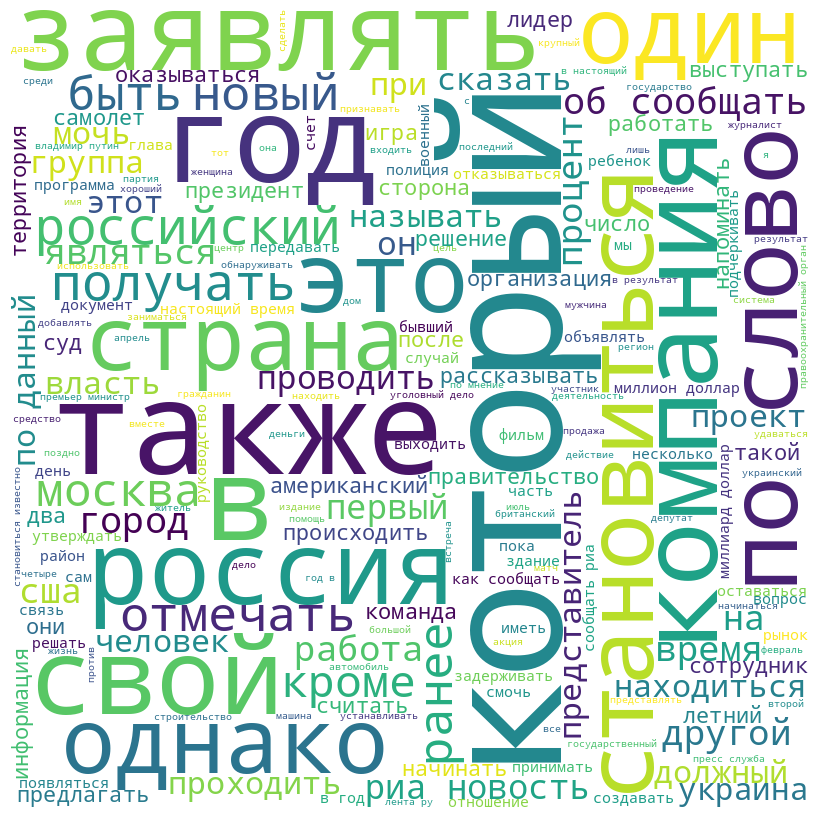

In [ ]:
def generate_wordcloud(series, stopwords = None):
    words = functools.reduce(
        lambda text, subtext : f'{text} {subtext} ',
        series,
        '',
    )
    return WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

def show_wordclouds(*wordclouds):
    for wordcloud in wordclouds:
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.show()

show_wordclouds(generate_wordcloud(df["processed_text_tfidf"]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--- CLUSTER #0 ---


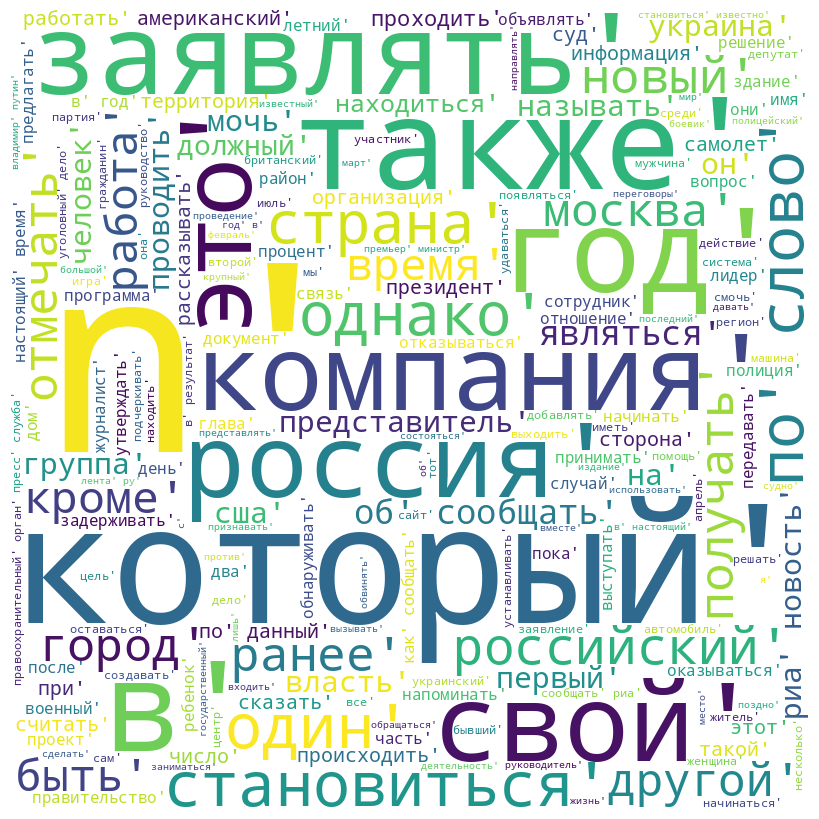

--- CLUSTER #1 ---


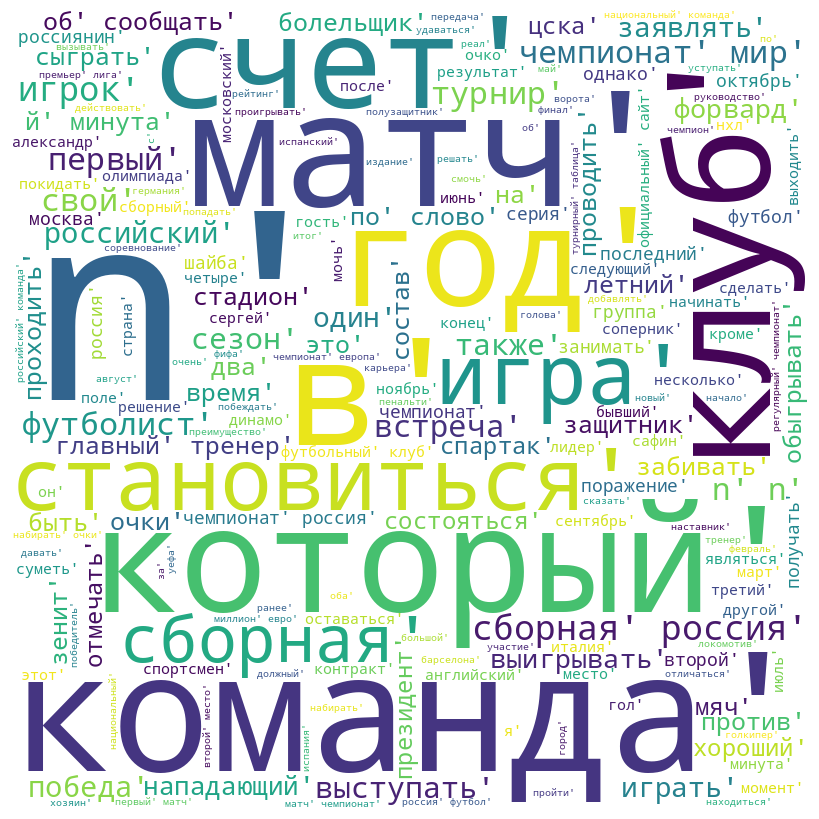

--- CLUSTER #2 ---


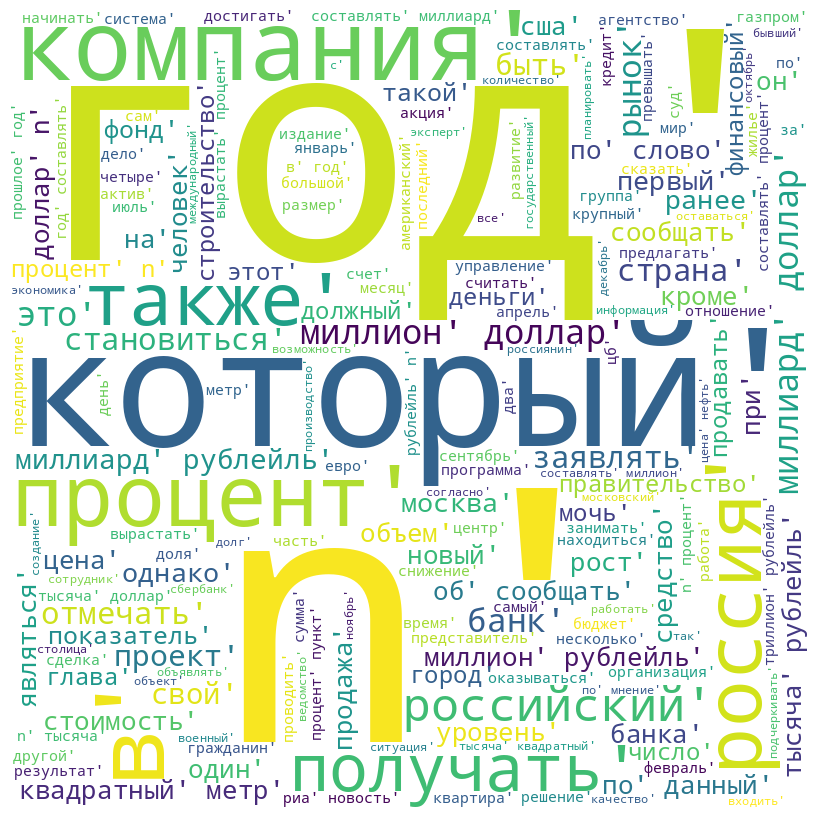

--- CLUSTER #3 ---


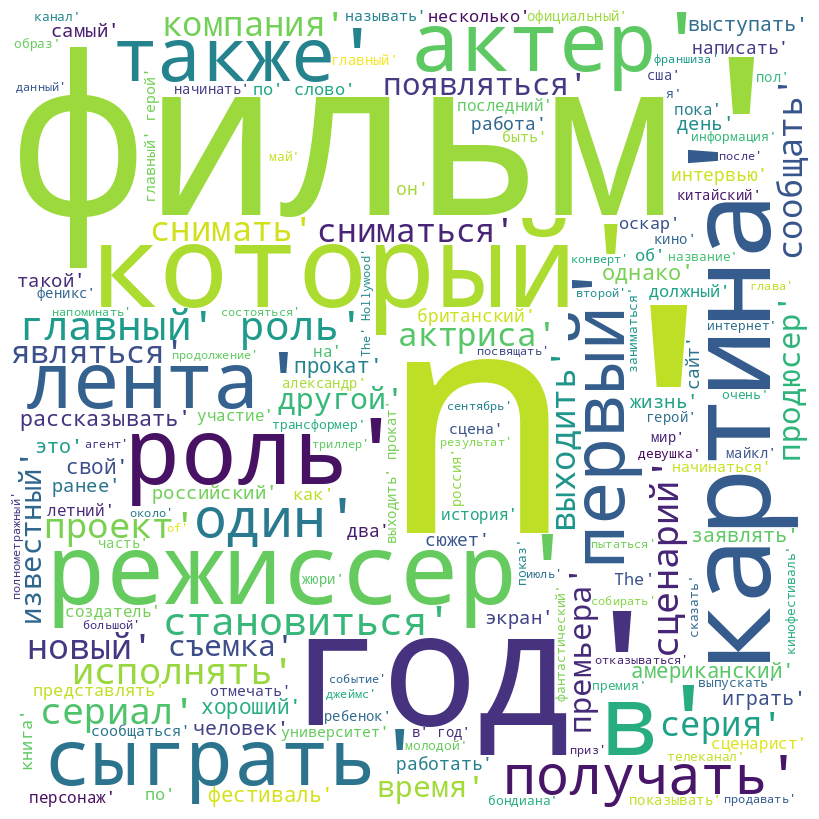

In [ ]:
for i in range(4):
    print(f"--- CLUSTER #{i} ---")
    cluster = df[df['agglomerative_clustering_labels'] == i]
    show_wordclouds(generate_wordcloud(cluster["processed_text_tfidf"].str.split(' ')))

#### t-SNE + KMeans

Кластеризация и визуализация с понижением размерности

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


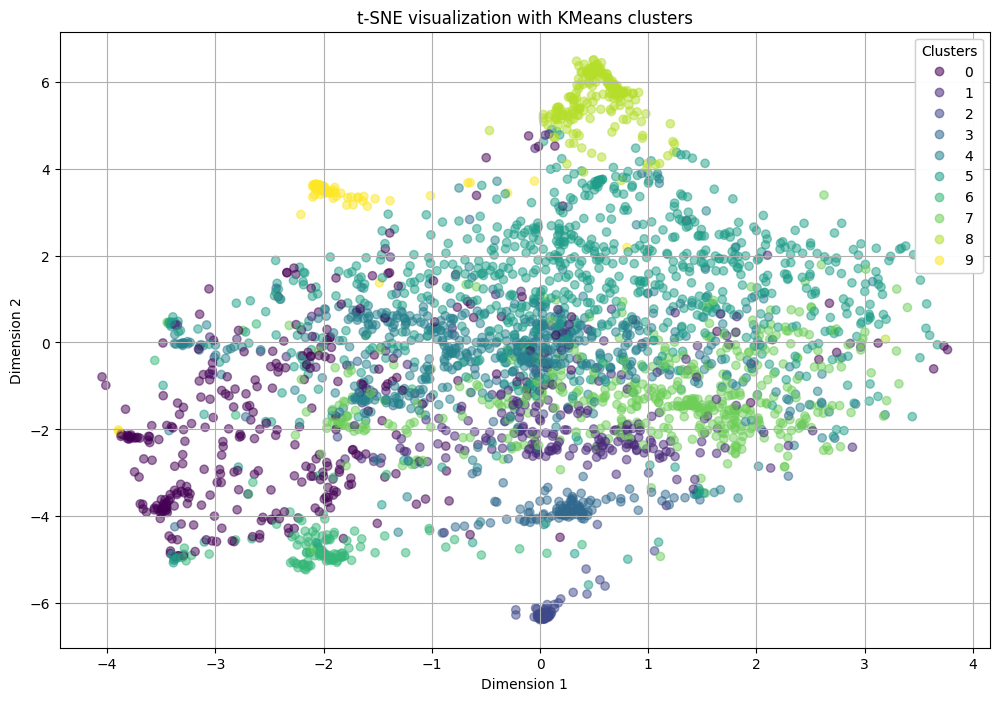

In [ ]:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
clusters = kmeans.predict(tfidf_matrix)

df_tsne = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Cluster'] = clusters

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], c=df_tsne['Cluster'], cmap='viridis', alpha=0.5)

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE visualization with KMeans clusters')
plt.grid(True)
plt.show()

### Кластеризация по-NLPшному Topic modeling

Latent Dirichlet Allocation (LDA) — это метод тематического моделирования, который автоматически выявляет скрытые темы в больших коллекциях текстов. Он используется для анализа текстовых данных, улучшения поиска и категоризации документов.

Преимущества и ограничения

Преимущества:
+ Автоматическое выделение тем.
+ Интерпретируемые результаты.

Ограничения:
- Чувствительность к параметрам.
- Вычислительная сложность для больших наборов данных.

In [ ]:
num_topics = 4
dictionary = corpora.Dictionary(df['processed_text_tfidf_tokens'])
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['processed_text_tfidf_tokens']]
lda = LdaModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda, doc_term_matrix, dictionary)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.035102 -0.001602       1        1  40.855868
0      0.001569 -0.031798       2        1  24.387637
1      0.009149  0.029771       3        1  22.652844
2     -0.045821  0.003629       4        1  12.103651, topic_info=         Term         Freq        Total Category  logprob  loglift
796   процент  1076.000000  1076.000000  Default  30.0000  30.0000
9           в  3999.000000  3999.000000  Default  29.0000  29.0000
251    россия  1822.000000  1822.000000  Default  28.0000  28.0000
15        год  4878.000000  4878.000000  Default  27.0000  27.0000
592       )\n  2795.000000  2795.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
45         об   120.225245  1203.442441   Topic4  -6.0326  -0.1919
145  отмечать   107.033583   928.037765   Topic4  -6.1488  -0.0483
104     глава    99.869114   674.475061   Topic4  -6.2181   0.2016
610        на    97.910917   673.980970   Topic4  -6.2379   0.1825
827      один    98.390969   980.107136   Topic4  -6.2330  -0.1870

[388 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
591        1  0.417897   (\n
591        2  0.327889   (\n
591        3  0.168231   (\n
591        4  0.086080   (\n
592        1  0.410271   )\n
...      ...       ...   ...
25469      2  0.121023  язва
25469      4  0.726139  язва
15253      1  0.912432  яшин
15253      2  0.065174  яшин
15253      3  0.065174  яшин

[855 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

### Классификация база с TF-IDF

Классификация является одной из ключевых задач в обработке естественного языка (NLP). Она включает в себя категоризацию текстовых данных на заранее определенные классы или категории. Вот некоторые из наиболее распространенных задач классификации в NLP:

1. Классификация текста

Классификация текста включает определение категории или метки для данного текста. Примеры включают классификацию новостных статей по темам (например, спорт, политика, технологии) или классификацию электронных писем как спам или не спам.

2. Анализ тональности (Sentiment Analysis)

Анализ тональности направлен на определение эмоциональной окраски текста, например, положительной, нейтральной или отрицательной. Это часто используется для анализа отзывов клиентов, комментариев в социальных сетях или рецензий на продукты.

3. Классификация новостей

Классификация новостей предполагает автоматическую сортировку новостных статей по темам, таким как экономика, здоровье, развлечения и спорт. Это помогает пользователям быстро находить новости по интересующим их темам.

4. Определение намерения (Intent Detection)

Определение намерения используется в чат-ботах и виртуальных помощниках для понимания цели или намерения пользователя, например, запрос информации, выполнение задачи или получение помощи. Примеры намерений включают "забронировать билет", "узнать погоду" или "найти ресторан".

5. Классификация жанра текста

Эта задача включает определение жанра текстового документа, такого как научная статья, блог, новостная статья или художественная литература. Это полезно для организации библиотек и баз данных.

6. Определение субъективности (Subjectivity Classification)

Определение субъективности включает классификацию текста как субъективного (выражающего личное мнение) или объективного (основанного на фактах). Это полезно для фильтрации информации и анализа мнений.

Примеры методов для классификации в NLP

1. **Логистическая регрессия**:
   - Простой и эффективный метод для бинарной классификации, который также может быть расширен до многоклассовой классификации.

2. **Наивный байесовский классификатор**:
   - Часто используется для задач классификации текста, таких как спам-фильтры, благодаря своей простоте и эффективности.

3. **Деревья решений и случайные леса**:
   - Мощные методы, способные обрабатывать как бинарные, так и многоклассовые задачи классификации.

4. **Методы глубокого обучения**:
   - **RNN (рекуррентные нейронные сети)** и **LSTM (долгая краткосрочная память)** используются для задач, связанных с последовательностями, таких как анализ тональности и определение намерения.
   - **Transformers (например, BERT, GPT)** обеспечивают высокую точность и производительность в различных задачах классификации благодаря своей способности учитывать контекст на уровне предложения и документа.

In [ ]:
df['is_global'] = df['topic'] == 'Мир'
df['is_global'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


is_global
False    2502
True      498
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_text_tfidf'], df['is_global'], test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def try_model(model):
  pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Шаг TF-IDF
    ('classifier', model),  # Шаг классификации
  ])

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  roc_auc = roc_auc_score(y_test, y_proba)
  report = classification_report(y_test, y_pred)

  print(f'ROC-AUC Score: {roc_auc}')
  print('Classification Report:')
  print(report)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
try_model(MultinomialNB())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ROC-AUC Score: 0.5
Classification Report:
              precision    recall  f1-score   support

       False       0.85      1.00      0.92       513
        True       0.00      0.00      0.00        87

    accuracy                           0.85       600
   macro avg       0.43      0.50      0.46       600
weighted avg       0.73      0.85      0.79       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
try_model(RandomForestClassifier(n_estimators=100, class_weight='balanced'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ROC-AUC Score: 0.5
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.99      0.94       513
        True       0.88      0.24      0.38        87

    accuracy                           0.89       600
   macro avg       0.88      0.62      0.66       600
weighted avg       0.88      0.89      0.86       600



Не всегда все получается с наскока :(
Так бывает, если классы несбалансированны и нет четких фич (ключевых слов).

https://huggingface.co/

### Открытые модели

Sentiment

In [ ]:
def apply(series, func, onerr=''):
    preds = []
    for element in tqdm(series.tolist()):
        try:
          preds.append(func(element))
        except Exception as e:
          print(str(e)[:300])
          preds.append(onerr)
    return preds

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def cointegrated_model(name):
    tokenizer = AutoTokenizer.from_pretrained(name)
    model = AutoModelForSequenceClassification.from_pretrained(name)
    if torch.cuda.is_available():
        model.cuda()
    if torch.backends.mps.is_available():
        model.to(torch.device("mps"))
    return model, tokenizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_checkpoint = 'cointegrated/rubert-tiny-sentiment-balanced'
rtsb_model, rtsb_tokenizer = cointegrated_model(model_checkpoint)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/377 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/241k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/468k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/884 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.2M [00:00<?, ?B/s]

In [ ]:
def get_sentiment(model, tokenizer, text, return_type='label'):
    with torch.no_grad():
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True).to(model.device)
        proba = torch.sigmoid(model(**inputs).logits).cpu().numpy()[0]
    if return_type == 'label':
        return model.config.id2label[proba.argmax()]
    elif return_type == 'score':
        return proba.dot([-1, 0, 1])
    return proba

def rtsb_callable(model, tokenizer, return_type):
    def func(inp):
        return  get_sentiment(model, tokenizer, inp, return_type)
    return func

text = 'Какая гадость эта ваша заливная рыба!'
# classify the text
print(get_sentiment(rtsb_model, rtsb_tokenizer, text, 'label'))  # negative
# score the text on the scale from -1 (very negative) to +1 (very positive)
print(get_sentiment(rtsb_model, rtsb_tokenizer, text, 'score'))  # -0.5894946306943893
# calculate probabilities of all labels
print(get_sentiment(rtsb_model, rtsb_tokenizer, text, 'proba'))  # [0.7870447  0.4947824  0.19755007]

rtsbm =  rtsb_callable(rtsb_model, rtsb_tokenizer, 'label')
print(rtsbm(text))  # negative

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


negative
-0.5894947499036789
[0.78704476 0.4947824  0.19755001]
negative


In [ ]:
df[model_checkpoint] = apply(df["title"], rtsbm)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 3000/3000 [00:45<00:00, 65.57it/s]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='cointegrated/rubert-tiny-sentiment-balanced'>

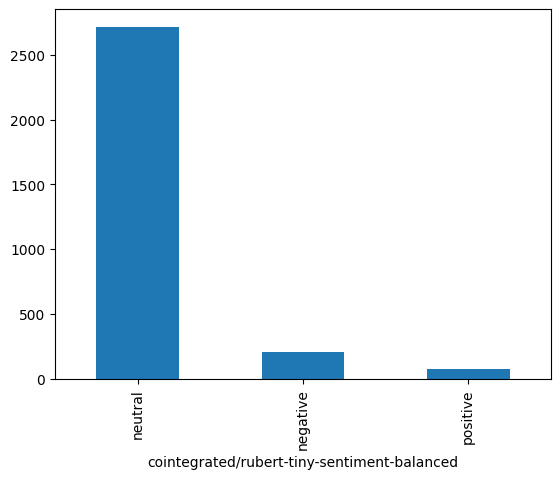

In [ ]:
df[model_checkpoint].value_counts().plot(kind='bar')

In [ ]:
df[df[model_checkpoint] == 'negative']['title']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


339280    В аэропорту Эр-Рияда разбился грузовой самолет...
147789    Книгу про Дональда Дака конфисковали у беспоко...
475700    Производители табака поспорили из-за дизайна р...
154207    Росимущество обвинили в злоупотреблении бомбоу...
767774    Реклама против ожирения вызвала у зрителей чув...
                                ...                        
79628     За год в гражданской авиации России произошло ...
278962           На Енисейском ЦБК ввели внешнее управление
502635       Украина прекратила поставки автомобилей в Крым
96598     Альфа-банк: Сообщения о наших проблемах — выду...
273683     Маньяк Фритцль готов частично признать свою вину
Name: title, Length: 207, dtype: object

**NER**

Полезная статья:

https://habr.com/ru/articles/675220/

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("Babelscape/wikineural-multilingual-ner")
model = AutoModelForTokenClassification.from_pretrained("Babelscape/wikineural-multilingual-ner")

nlp = pipeline("ner", model=model, tokenizer=tokenizer,aggregation_strategy=AggregationStrategy.SIMPLE)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
entities = [v for text in df['title'].iloc[:10] for v in nlp(text)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
[v['word'] for v in entities]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Оззи Осборна',
 'Осло',
 'Абеля',
 'Нью - Йорк',
 'Рен ТВ',
 'Г',
 'Россию',
 'Фельгенгау',
 'Судь',
 'Эр - Рияда',
 'Lufthansa',
 'Путина']

**Embeddings**

Большие модели, такие как BERT (Bidirectional Encoder Representations from Transformers), GPT (Generative Pre-trained Transformer) и другие, значительно превосходят простые модели типа TF-IDF и Word2Vec по нескольким причинам:

1. **Контекстуальное понимание**:
   - Большие модели используют контекстуальные вложения, которые учитывают смысл слов в зависимости от их окружения. Например, слово "bank" будет иметь разные представления в контексте "river bank" и "financial bank".

2. **Двусторонний анализ**:
   - Модели типа BERT анализируют текст в обоих направлениях (слева направо и справа налево), что позволяет им лучше понимать контекст и зависимости между словами.

3. **Глубокое обучение**:
   - Большие модели используют глубокие нейронные сети, которые способны захватывать сложные зависимости и паттерны в данных. Это делает их чрезвычайно мощными для различных задач NLP.

4. **Предварительное обучение и дообучение**:
   - Эти модели обучаются на огромных корпусах текстов и затем дообучаются на конкретных задачах, что позволяет им адаптироваться к различным типам данных и задачам.

Полезная статья:

https://habr.com/ru/articles/446530/

In [ ]:
name = 'sentence-transformers/paraphrase-multilingual-mpnet-base-v2'
model = SentenceTransformer(name)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.encode(list(df['title'].iloc[:3])).tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[-0.012461714446544647,
  -0.021959148347377777,
  -0.01721150241792202,
  -0.057143937796354294,
  0.008416549302637577,
  0.06437041610479355,
  0.06517408788204193,
  -0.0049096401780843735,
  -0.09470180422067642,
  0.12230055034160614,
  -0.04078175127506256,
  0.019155263900756836,
  -0.053090184926986694,
  -0.029680216684937477,
  -0.1247524693608284,
  0.016343992203474045,
  -0.11956051737070084,
  0.05438423156738281,
  0.027366073802113533,
  0.010568251833319664,
  0.0371842123568058,
  0.02775677852332592,
  0.006300080101937056,
  0.0007400259491987526,
  0.13858002424240112,
  -0.013878013007342815,
  -0.010936053469777107,
  0.07760492712259293,
  -0.032878097146749496,
  0.032376062124967575,
  -0.0421220064163208,
  0.01987646520137787,
  -0.014002087526023388,
  0.04474826157093048,
  0.027707939967513084,
  -0.03930537775158882,
  0.03724043443799019,
  0.042687829583883286,
  0.03768383711576462,
  -0.06806951761245728,
  0.08334244787693024,
  -0.028396775946021

Дополнительное чтение.

Крутые тетрадки на посмотреть:
* https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained
* https://www.kaggle.com/code/abhishek/approaching-almost-any-nlp-problem-on-kaggle